<a href="https://colab.research.google.com/github/Andrade020/Teste-MeetupR/blob/master/Marketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finpie
!pip install rpy2
!pip install tabulate

In [4]:
import finpie
import finpie.price_data
from finpie import NewsData
from finpie import price_data
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import math
import rpy2
%load_ext rpy2.ipython

In [60]:
def acs(tickers): #recebe acoes e retorna vetor com as expectativas da regressao fundamentalista
  valores=[]
  for acao in tickers: 
    try:
      value= (finpie.Fundamentals(acao, source = 'yahoo', freq = 'A').esg_score().iloc[0]['ticker'])
      valores.append(value)
      pass
    except:
      pass   
  return valores 
def enriskvector(tickers): #recebe acoes e retorna vetor com as expectativas da regressao fundamentalista
  valores=[]
  for acao in tickers: 
    try:
      value= np.nan_to_num(finpie.Fundamentals(acao, source = 'yahoo', freq = 'A').esg_score().iloc[0]['environment_risk_score'])
      valores.append(value)
      pass
    except:
      pass   
  return valores  
def esgvector(tickers): #recebe acoes e retorna vetor com as expectativas da regressao fundamentalista
  valores=[]
  for acao in tickers: 
    try:
      value= np.nan_to_num(finpie.Fundamentals(acao, source = 'yahoo', freq = 'A').esg_score().iloc[0]['total_esg_risk_score'])
      valores.append(value)
      pass
    except:
       pass 
  return valores    
def socriskvector(tickers): #recebe acoes e retorna vetor com as expectativas da regressao fundamentalista
  valores=[]
  for acao in tickers: 
    try: 
      value= np.nan_to_num(finpie.Fundamentals(acao, source = 'yahoo', freq = 'A').esg_score().iloc[0]['social_risk_score'])
      valores.append(value)
      pass
    except:
       pass 
  return valores    
def govriskvector(tickers): #recebe acoes e retorna vetor com as expectativas da regressao fundamentalista
  valores=[]
  for acao in tickers:
    try: 
      value= np.nan_to_num(finpie.Fundamentals(acao, source = 'yahoo', freq = 'A').esg_score().iloc[0]['governance_risk_score'])
      valores.append(value)
      pass
    except:
       pass 
  return valores 


In [172]:
%%R --o acx
library(BatchGetSymbols)
acx<- GetSP500Stocks()[1]

In [190]:
#brazilian stocks
#ac=["PETR4.SA","OIBR3.SA","VVAR3.SA","COGN3.SA","ITUB4.SA","PETR3.SA","ITSA4.SA","MGLU3.SA","CIEL3.SA","VALE3.SA","IRBR3.SA","ABEV3.SA","B3SA3.SA","BRML3.SA","USIM5.SA","BBAS3.SA","CSNA3.SA","LAME4.SA","GGBR4.SA","EMBR3.SA","GOAU4.SA","JBSS3.SA","GFSA3.SA","MRFG3.SA","BRDT3.SA","LWSA3.SA","UGPA3.SA","POMO4.SA","HAPV3.SA","EQTL3.SA","RAIL3.SA","CCRO3.SA","MULT3.SA","CMIG4.SA","PCAR3.SA","BRFS3.SA","BEEF3.SA","MEAL3.SA","CVCB3.SA","GOLL4.SA","SUZB3.SA","LREN3.SA","AZUL4.SA","ELET3.SA","DMMO3.SA","JHSF3.SA"]
acz=acx.values.tolist()
acz= acx.values.tolist()
acf = [item for sublist in acz for item in sublist]
ac=acs(acf)


enrisk= enriskvector(ac)
enriskdf=pd.DataFrame(enrisk)
enriskdf.columns=["Env_rsk"]
enriskdf.index=ac

esg= esgvector(ac)
esgdf=pd.DataFrame(esg)
esgdf.columns=["esg"]
esgdf.index=ac

govrisk= govriskvector(ac)
govriskdf=pd.DataFrame(govrisk)
govriskdf.columns=["Gov_rsk"]
govriskdf.index=ac


socrisk= socriskvector(ac)
socriskdf=pd.DataFrame(enrisk)
socriskdf.columns=["Soc_rsk"]
socriskdf.index=ac

df = esgdf
df =df.join(enriskdf)
df =df.join(govriskdf)
df =df.join(socriskdf)
df

,esg,Env_rsk,Gov_rsk,Soc_rsk
MMM,35.0,13.0,8.0,13.0
ABT,30.0,3.0,11.0,3.0
ABBV,29.0,1.0,11.0,1.0
ACN,11.0,1.0,6.0,1.0
ATVI,16.0,0.0,6.0,0.0
...,...,...,...,...
XLNX,23.0,10.0,8.0,10.0
XYL,16.0,4.0,5.0,4.0
YUM,21.0,4.0,4.0,4.0
ZBH,34.0,5.0,10.0,5.0


In [189]:
acz= acx.values.tolist()
acf = [item for sublist in acz for item in sublist]
acf

,total_esg_risk_score,risk_category,risk_percentile,environment_risk_score,social_risk_score,governance_risk_score,ticker
date,,,,,,,
2021-06-13,40.0,Severe,85th,11.0,20.0,8.0,TDG


In [151]:
%%R
library(dplyr)

In [5]:
%%R
install.packages("quantmod")
install.packages("PerformanceAnalytics")
install.packages("PortfolioAnalytics")
install.packages("ROI.plugin.quadprog")
install.packages("ROI.plugin.glpk")
library(quantmod)
library(PerformanceAnalytics)
library(PortfolioAnalytics)
library(ROI.plugin.quadprog)
#library(ROI.plugin.glpk)
library(dpplyr)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[


Error in library(dpplyr) : there is no package called ‘dpplyr’


RInterpreterError: ignored

From cffi callback <function _processevents at 0x7f7fd6322dd0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f7fd6322dd0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f7fd6322dd0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


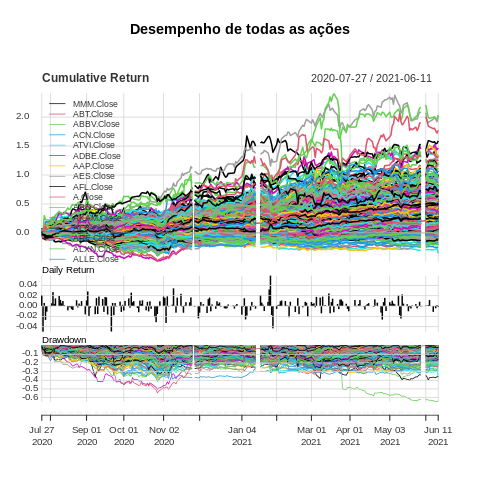

In [191]:
%%R --i ac

#how much is risk free rate
tx= 0.0001785
###############################################################
#tickers<- c("PETR4.SA","OIBR3.SA","VVAR3.SA","COGN3.SA","ITUB4.SA","PETR3.SA","ITSA4.SA","MGLU3.SA","CIEL3.SA","VALE3.SA","IRBR3.SA","ABEV3.SA","B3SA3.SA","BRML3.SA","USIM5.SA","BBAS3.SA","CSNA3.SA","LAME4.SA","GGBR4.SA","EMBR3.SA","GOAU4.SA","JBSS3.SA","GFSA3.SA","MRFG3.SA","BRDT3.SA","LWSA3.SA","UGPA3.SA","POMO4.SA","HAPV3.SA","EQTL3.SA","RAIL3.SA","CCRO3.SA","MULT3.SA","CMIG4.SA","PCAR3.SA","BRFS3.SA","BEEF3.SA","MEAL3.SA","CVCB3.SA","GOLL4.SA","SUZB3.SA","LREN3.SA","AZUL4.SA","ELET3.SA","DMMO3.SA","JHSF3.SA")
tickers<-ac
marketPrices<- NULL
marketReturns<-NULL
for (ticker in tickers){
  marketPrices<- cbind(marketPrices, na.omit(getSymbols.yahoo(ticker, from="2020-07-24", periodicity = 'daily', auto.assign=F)[,4]))
  #recomendacao: 2020-07-24
}
benchmarkPrices<- na.omit(getSymbols.yahoo('^BVSP', from="2020-07-24", periodicity = 'daily', auto.assign=F)[,4])
benchmarkReturns<- na.omit(ROC(benchmarkPrices)) #ROC significa Rate of Change, geometrico
selic=list()

marketReturns<-na.omit(ROC(marketPrices)) # df com retornos de todas as acoes
n=(nrow(marketReturns)) ###calculo o numero de dias
for (i in 1:n ){                             ##serie com os dados da taxa livre de risco
  selic[i]<- tx
}
selic[3]<- -tx
marketReturns$tesouro <- selic          ## incorpora taxa livre de risco

rets_df<- cbind(marketReturns, benchmarkReturns)
charts.PerformanceSummary(rets_df, main="Desempenho de todas as ações") # grafico mostrando os retornos de todas as acoes
#chart.CumReturns(rets_df, main="Desempenho de todas as ações")

In [192]:
%%R --i df
alfa<-NULL
beta<-NULL
for (ticker in tickers){
  alfa= rbind(alfa, CAPM.jensenAlpha(marketReturns<-na.omit(ROC(getSymbols.yahoo(ticker, from="2020-07-24", periodicity = 'daily', auto.assign=F)[,4])), benchmarkReturns, 0.045/252))
}
for (ticker in tickers){
  beta= rbind(beta, CAPM.beta(marketReturns<-na.omit(ROC(getSymbols.yahoo(ticker, from="2020-07-24", periodicity = 'daily', auto.assign=F)[,4])), benchmarkReturns, 0.045/252))
}


rownames(alfa)<-tickers
rownames(beta)<-tickers
df= cbind(df, alfa )
df= cbind(df, beta )
df

      esg Env_rsk Gov_rsk Soc_rsk         alfa         beta
MMM    35      13       8      13  0.211463457  0.238282130
ABT    30       3      11       3  0.046625739  0.151603337
ABBV   29       1      11       1  0.147655422  0.126900003
ACN    11       1       6       1  0.204800114  0.329772650
ATVI   16       0       6       0  0.104721101  0.361836711
ADBE   11       0       5       0  0.098328469  0.466990197
AAP    12       0       3       0  0.295489568  0.241135591
AES    35      21       6      21  0.552447310  0.552318638
AFL    23       2      13       2  0.425587347  0.488790436
A      17       1       6       1  0.472214685  0.313976118
APD    11       6       4       6 -0.118788211  0.405468689
AKAM   21       2       8       2 -0.059017759  0.278839527
ALB    37      19       9      19  0.663868470  0.751801987
ARE    15       3       6       3  0.099268582  0.160972692
ALXN   19       0       6       0  0.732658209  0.292008833
ALLE   23      12       7      12  0.293

In [210]:
from google.colab import files
df.to_csv('newfilename.csv') 
files.download('newfilename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df= pd.read_csv("/content/dadosSP500esg.csv")


In [209]:
%%R --o df
df


      esg Env_rsk Gov_rsk Soc_rsk         alfa         beta
MMM    35      13       8      13  0.211463457  0.238282130
ABT    30       3      11       3  0.046625739  0.151603337
ABBV   29       1      11       1  0.147655422  0.126900003
ACN    11       1       6       1  0.204800114  0.329772650
ATVI   16       0       6       0  0.104721101  0.361836711
ADBE   11       0       5       0  0.098328469  0.466990197
AAP    12       0       3       0  0.295489568  0.241135591
AES    35      21       6      21  0.552447310  0.552318638
AFL    23       2      13       2  0.425587347  0.488790436
A      17       1       6       1  0.472214685  0.313976118
APD    11       6       4       6 -0.118788211  0.405468689
AKAM   21       2       8       2 -0.059017759  0.278839527
ALB    37      19       9      19  0.663868470  0.751801987
ARE    15       3       6       3  0.099268582  0.160972692
ALXN   19       0       6       0  0.732658209  0.292008833
ALLE   23      12       7      12  0.293

In [213]:
%%R
summary(lm(alfa~esg ,data=df))
#cor(df$esg, df$Env_rsk)


Call:
lm(formula = alfa ~ esg, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77594 -0.25245 -0.07321  0.17001  2.05206 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.355855   0.055699   6.389 4.18e-10 ***
esg         -0.001555   0.002374  -0.655    0.513    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.37 on 450 degrees of freedom
Multiple R-squared:  0.0009526,	Adjusted R-squared:  -0.001267 
F-statistic: 0.4291 on 1 and 450 DF,  p-value: 0.5128



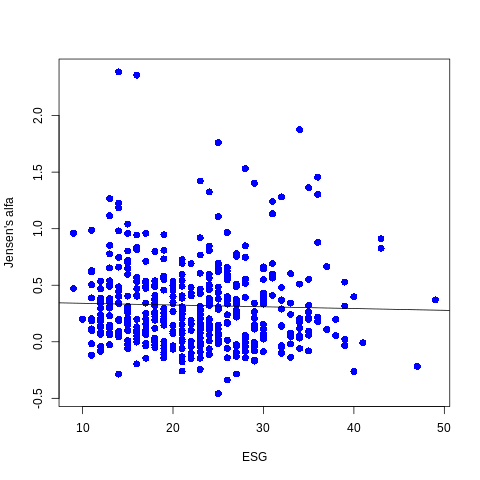

In [217]:
%%R
plot(df$esg, df$alfa, pch = 16, cex = 1.3, col = "blue", main = "", xlab = "ESG", ylab = "Jensen's alfa")
abline(lm(alfa~esg ,data=df))


In [17]:
top50=df.nlargest(50, "esg").index.values
top50df= df.nlargest(50, "esg")

In [15]:
df.index= df["Unnamed: 0"]
df.index.name=""
df

,Unnamed: 0,esg,Env_rsk,Gov_rsk,Soc_rsk,alfa,beta
,,,,,,,
MMM,MMM,35.0,13.0,8.0,13.0,0.211463,0.238282
ABT,ABT,30.0,3.0,11.0,3.0,0.046626,0.151603
ABBV,ABBV,29.0,1.0,11.0,1.0,0.147655,0.126900
ACN,ACN,11.0,1.0,6.0,1.0,0.204800,0.329773
ATVI,ATVI,16.0,0.0,6.0,0.0,0.104721,0.361837
...,...,...,...,...,...,...,...
XLNX,XLNX,23.0,10.0,8.0,10.0,0.031178,0.522033
XYL,XYL,16.0,4.0,5.0,4.0,0.531623,0.398530
YUM,YUM,21.0,4.0,4.0,4.0,0.202714,0.349374


                              portfolio.returns
StdDev Sharpe (Rf=0%, p=95%):        0.15476999
VaR Sharpe (Rf=0%, p=95%):           0.11412598
ES Sharpe (Rf=0%, p=95%):            0.09012324


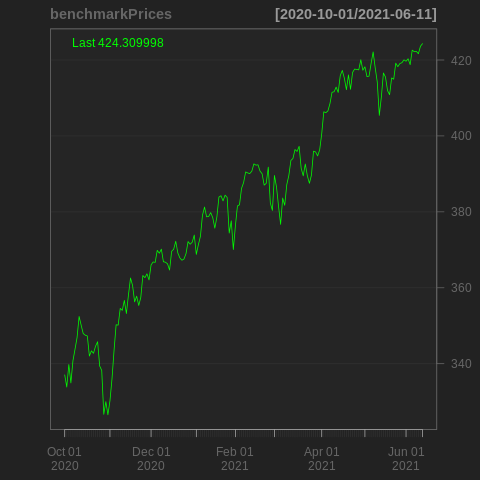

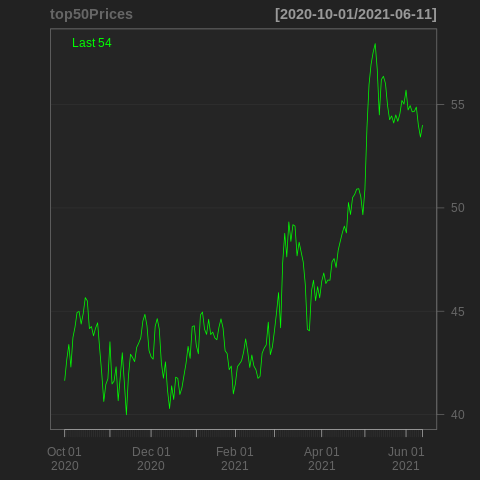

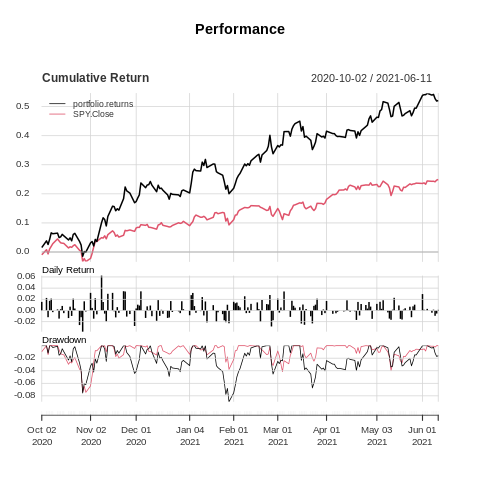

In [66]:
%%R --i top50
top50Prices<-NULL
for (ticker in top50){
  top50Prices<- cbind(top50Prices, na.omit(getSymbols.yahoo(ticker, from="2020-10-01", periodicity = 'daily', auto.assign=F)[,4]))
}
benchmarkPrices<- na.omit(getSymbols.yahoo('SPY', from="2020-10-01", periodicity = 'daily', auto.assign=F)[,4])
benchmarkReturns<- na.omit(ROC(benchmarkPrices)) #ROC significa Rate of Change, geometrico
top50Returns<-na.omit(ROC(top50Prices))

chartSeries(benchmarkPrices)
chartSeries(top50Prices)
top50Return <- Return.portfolio(top50Returns) # isso considera os retornos dado os pesos

CAPM.beta(top50Return, benchmarkReturns, 0.045/252)# eh a medidade de risco com relacao ao mercado
CAPM.jensenAlpha(top50Return, benchmarkReturns, 0.045/252) # o quanto o portfolio bate o mercado
retscomp= cbind(top50Return, benchmarkReturns)
charts.PerformanceSummary(retscomp, main="Performance") 
SharpeRatio(top50Return, 0.045/252)   # mede o quanto o risco extra retorna

#CAPM.jensenAlpha(top50Return, benchmarkReturns, 0.045/252)

In [114]:
%%R
dat= "2015-10-01"
ano=2015
sharp<-NULL
alfa_JEN<-NULL
for (i in 1:5){

ano= ano+1
dat= sub(as.character(ano-1), as.character(ano), dat)
top50Prices<-NULL

for (ticker in top50){
  top50Prices<- cbind(top50Prices, na.omit(getSymbols.yahoo(ticker, from=dat, periodicity = 'daily', auto.assign=F)[,4]))
}
benchmarkPrices<- na.omit(getSymbols.yahoo('SPY', from=dat, periodicity = 'daily', auto.assign=F)[,4])
benchmarkReturns<- na.omit(ROC(benchmarkPrices)) #ROC significa Rate of Change, geometrico
top50Returns<-na.omit(ROC(top50Prices))


top50Return <- Return.portfolio(top50Returns)
sharp= cbind(sharp,SharpeRatio(top50Return, 0.045/252)[3] )
alfa_JEN= cbind(alfa_JEN,CAPM.jensenAlpha(top50Return, benchmarkReturns, 0.045/252) )
}
sharp

              [,1]         [,2]         [,3]        [,4]       [,5]
[1,] -0.0001493331 -0.001363275 -0.001614324 0.001621617 0.09012324


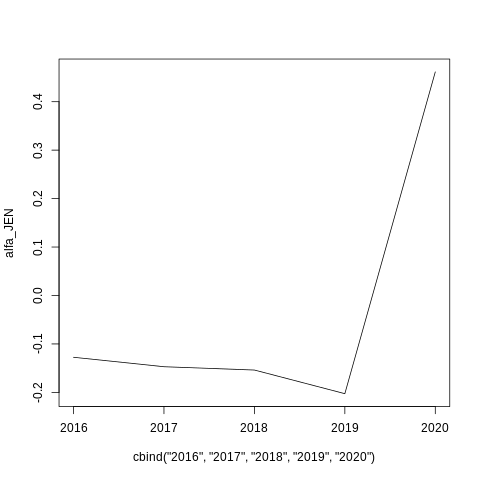

In [116]:
%%R
plot(cbind("2016", "2017", "2018", "2019", "2020"), alfa_JEN, type="l" )

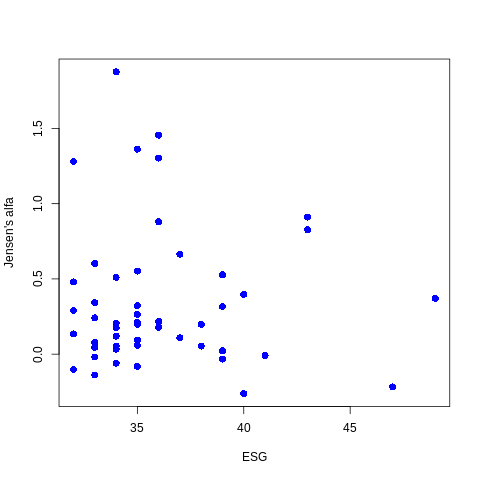

In [95]:
%%R --i top50df
plot(top50df$esg, top50df$alfa, pch = 16, cex = 1.3, col = "blue", main = "", xlab = "ESG", ylab = "Jensen's alfa")

In [151]:
%%R --i df
summary(lm(alfa~Dummy+Gov_rsk ,data=df))


Call:
lm(formula = alfa ~ Dummy + Gov_rsk, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78376 -0.23961 -0.06881  0.16940  2.09264 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.215273   0.054528   3.948 9.15e-05 ***
Dummy       -0.099926   0.098217  -1.017   0.3095    
Gov_rsk      0.015645   0.007469   2.095   0.0368 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3686 on 449 degrees of freedom
Multiple R-squared:  0.01067,	Adjusted R-squared:  0.006259 
F-statistic:  2.42 on 2 and 449 DF,  p-value: 0.09006



In [145]:
top100df= df.nlargest(100, "esg")

df["Dummy"] = (df["esg"] >= 37).astype(int)
df


,Unnamed: 0,esg,Env_rsk,Gov_rsk,Soc_rsk,alfa,beta,Dummy
,,,,,,,,
MMM,MMM,35.0,13.0,8.0,13.0,0.211463,0.238282,0
ABT,ABT,30.0,3.0,11.0,3.0,0.046626,0.151603,0
ABBV,ABBV,29.0,1.0,11.0,1.0,0.147655,0.126900,0
ACN,ACN,11.0,1.0,6.0,1.0,0.204800,0.329773,0
ATVI,ATVI,16.0,0.0,6.0,0.0,0.104721,0.361837,0
...,...,...,...,...,...,...,...,...
XLNX,XLNX,23.0,10.0,8.0,10.0,0.031178,0.522033,0
XYL,XYL,16.0,4.0,5.0,4.0,0.531623,0.398530,0
YUM,YUM,21.0,4.0,4.0,4.0,0.202714,0.349374,0
